# <span style="color:red">One Piece is a Japanese manga series written and illustrated by Eiichiro Oda.</span>

## The story is about the adventures of Monkey D. Luffy, a boy whose body gained the properties of rubber after unintentionally eating a Devil Fruit. With his pirate crew, the Straw Hat Pirates, Luffy explores the Grand Line in search of the deceased King of the Pirates Gol D. Roger's ultimate treasure known as the "One Piece" in order to become the next King of the Pirates.

Reference: https://en.wikipedia.org/wiki/One_Piece

# Strawhat Pirates

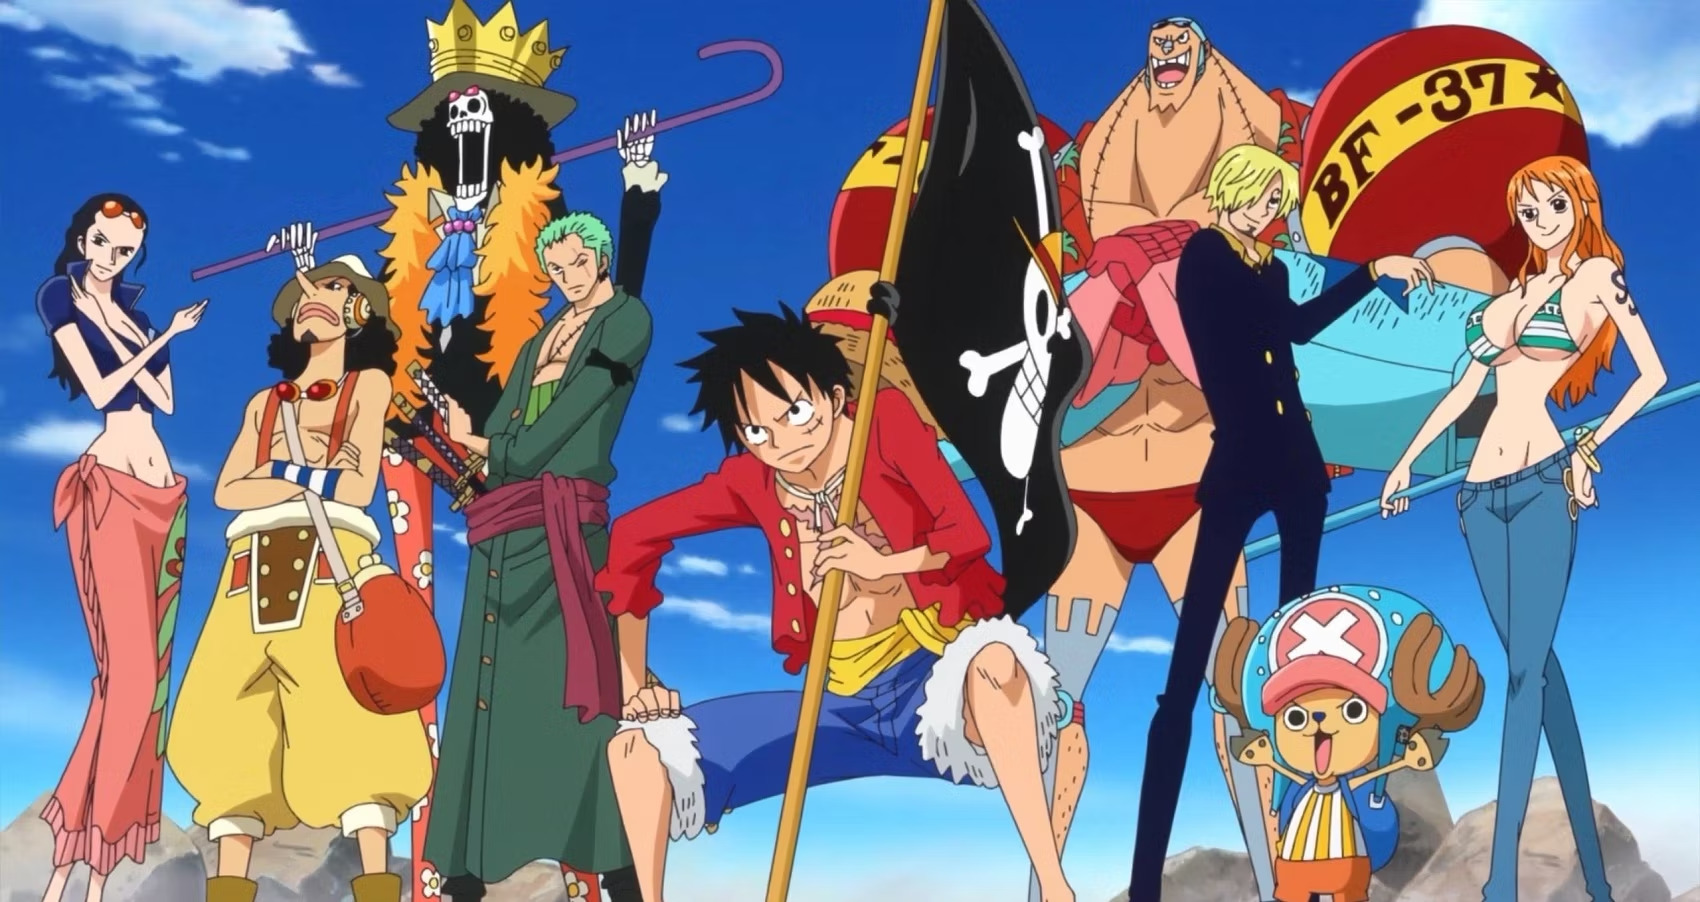

# Monkey D. Luffy
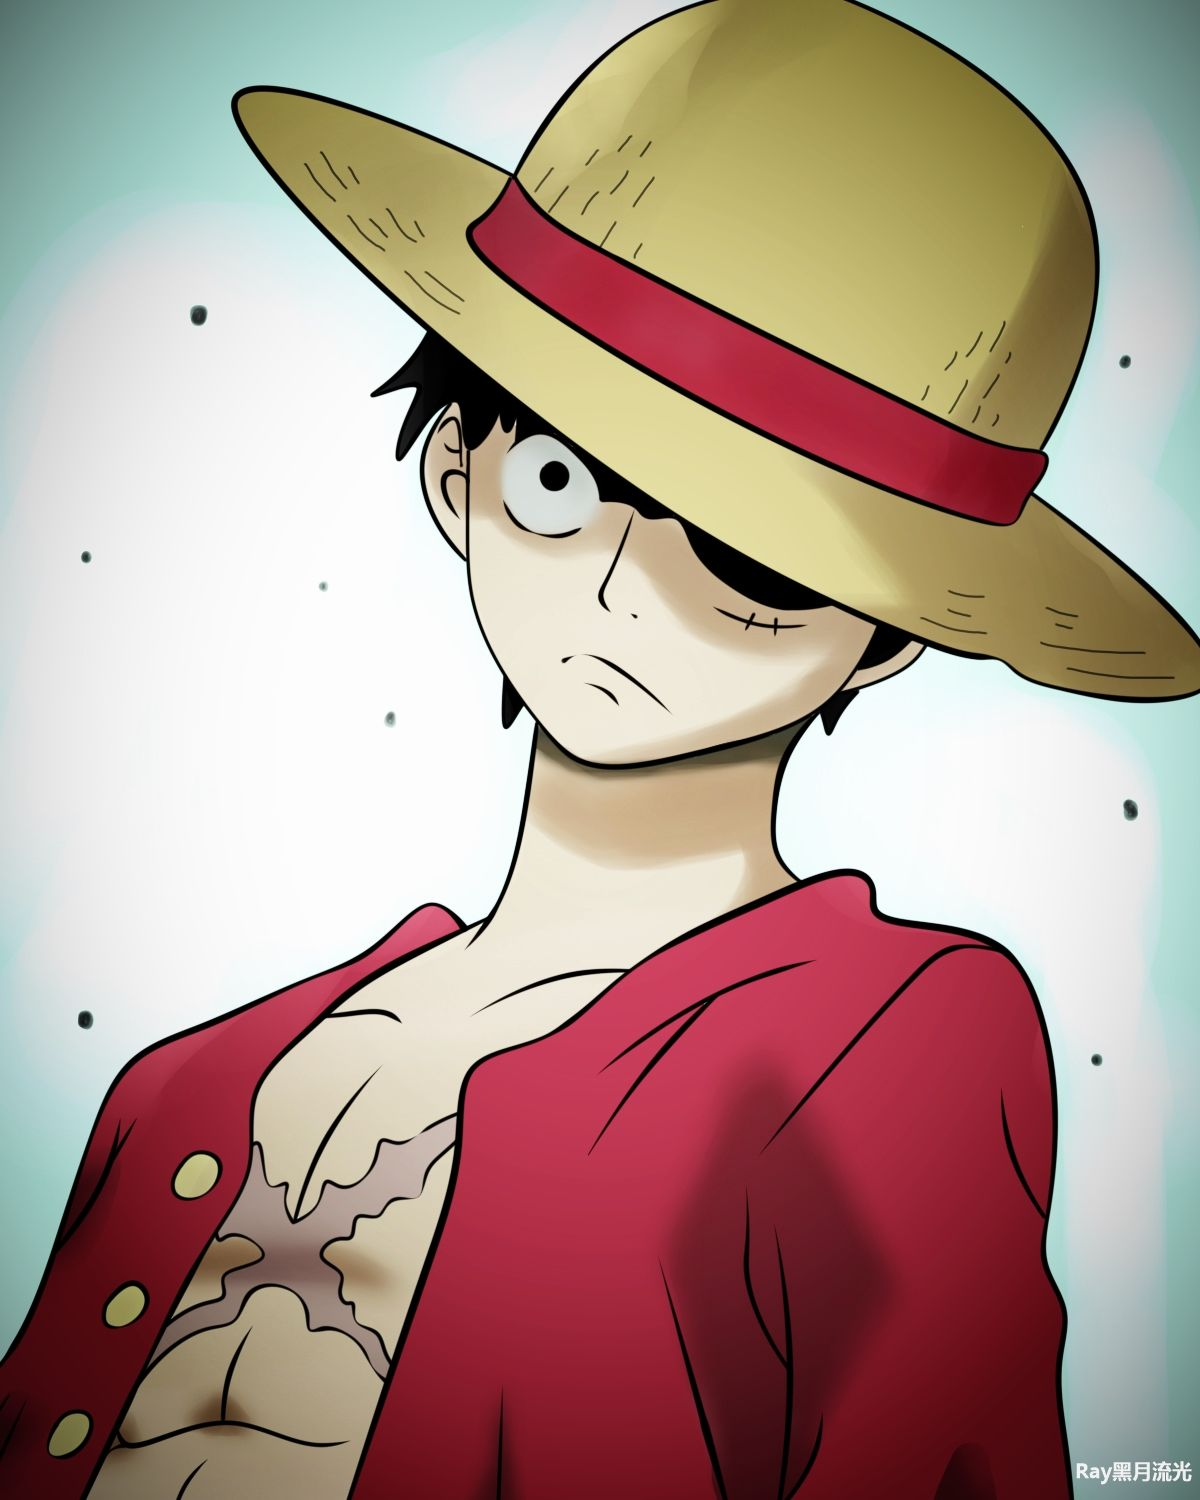

## Luffy to Reyleigh

## <span style="color:red">I don’t wanna conquer anything. It’s just that the person with the most freedom on the sea is the pirate king.</span>

Reference: https://www.cbr.com/one-piece-episode-1015-fan-reaction-luffy-yamato/

# Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import gc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/kaggle/input/one-piece-arcs/OnePieceArcs.csv')
df.head()

,Arc,Start onChapter,TotalChapters,TotalPages,Manga%,Start onEpisode,TotalEpisodes,TotalMinutes(avg 24),Anime%
0,Romance Dawn Arc,1,7,178,0.9%,1,3,72,0.3%
1,Orange Town Arc,8,14,273,1.4%,4,5,120,0.5%
2,Syrup Village Arc,22,20,396,2.0%,9,10,240,1.0%
3,Baratie Arc,42,27,514,2.6%,19,12,288,1.2%
4,Arlong Park Arc,69,27,514,2.6%,31,15,360,1.5%


In [3]:
df.tail()

,Arc,Start onChapter,TotalChapters,TotalPages,Manga%,Start onEpisode,TotalEpisodes,TotalMinutes(avg 24),Anime%
46,Levely Arc,903,6,100,0.5%,878,12,288,1.2%
47,Wano Country Arc: Act 1,909,16,278,1.4%,890,26,624,2.5%
48,Cidre Guild Arc,0,0,0,0.0%,895,2,48,0.2%
49,Wano Country Arc: Act 2,925,33,560,2.9%,918,41,984,4.0%
50,Wano Country Arc: Act 3,958,99,1709,8.8%,959,70,1680,6.8%


# EDA

In [4]:
df.shape

(51, 9)

In [5]:
df.isna().sum()

Arc                     0
Start onChapter         0
TotalChapters           0
TotalPages              0
Manga%                  0
Start onEpisode         0
TotalEpisodes           0
TotalMinutes(avg 24)    0
Anime%                  0
dtype: int64

In [6]:
df['Manga Percentage'] = df['Manga%'].apply(lambda x: float(x[:-1]))
df['Anime Percentage'] = df['Anime%'].apply(lambda x: float(x[:-1]))
df.drop(['Manga%', 'Anime%'], axis = 1, inplace = True)
df.head()

,Arc,Start onChapter,TotalChapters,TotalPages,Start onEpisode,TotalEpisodes,TotalMinutes(avg 24),Manga Percentage,Anime Percentage
0,Romance Dawn Arc,1,7,178,1,3,72,0.9,0.3
1,Orange Town Arc,8,14,273,4,5,120,1.4,0.5
2,Syrup Village Arc,22,20,396,9,10,240,2.0,1.0
3,Baratie Arc,42,27,514,19,12,288,2.6,1.2
4,Arlong Park Arc,69,27,514,31,15,360,2.6,1.5


In [7]:
# Filler arcs are those which doesn't have story in manga but the creators have made anime which is not related to the main line story
filler_Arcs = df.loc[df['Manga Percentage'] == 0, :]
filler_Arcs

,Arc,Start onChapter,TotalChapters,TotalPages,Start onEpisode,TotalEpisodes,TotalMinutes(avg 24),Manga Percentage,Anime Percentage
5,Buggy Side Story Arc,0,0,0,46,2,48,0.0,0.2
7,Warship Island Arc,0,0,0,54,8,192,0.0,0.8
10,Koby and Helmeppo Arc,0,0,0,68,2,48,0.0,0.2
14,Post-Alabasta Arc,0,0,0,131,5,120,0.0,0.5
15,Goat Island Arc,0,0,0,136,3,72,0.0,0.3
16,Ruluka Island Arc,0,0,0,139,5,120,0.0,0.5
19,G-8 Arc,0,0,0,196,11,264,0.0,1.1
21,Ocean's Dream Arc,0,0,0,220,5,120,0.0,0.5
22,Foxy's Return Arc,0,0,0,225,2,48,0.0,0.2
26,Ice Hunter Arc,0,0,0,326,11,264,0.0,1.1


# Visualization

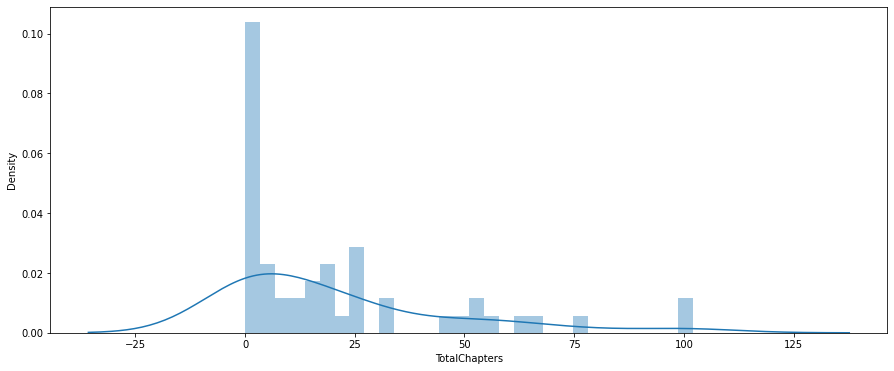

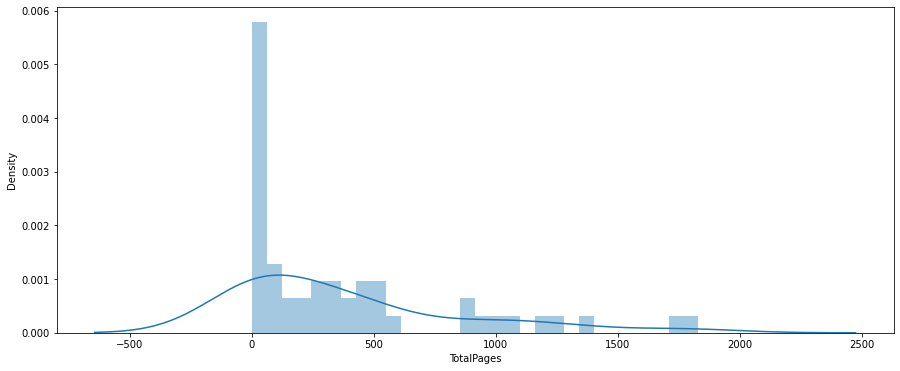

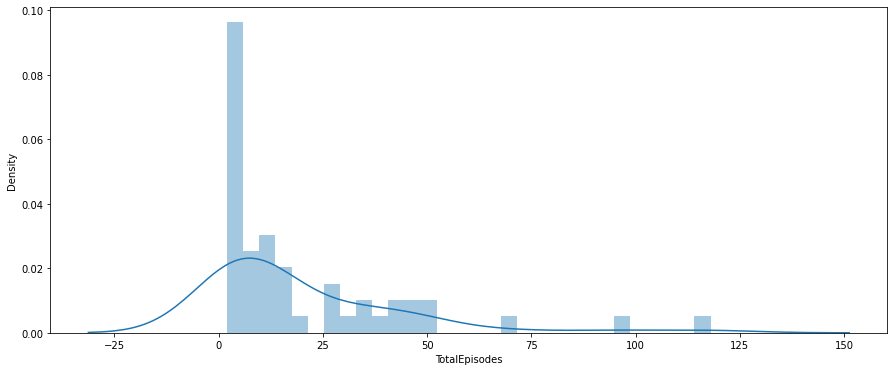

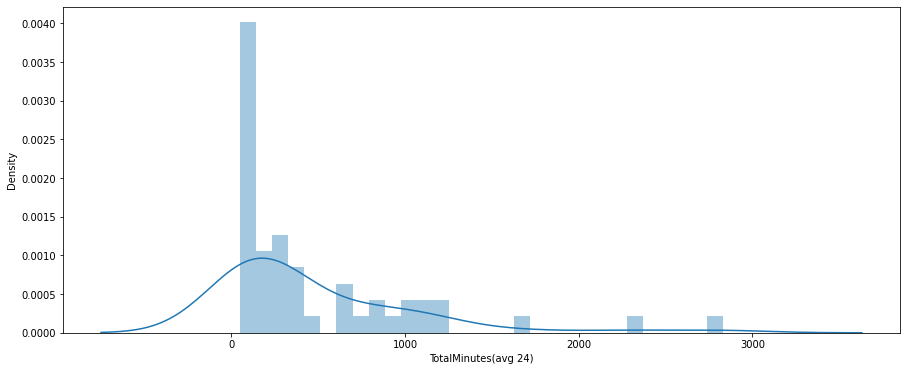

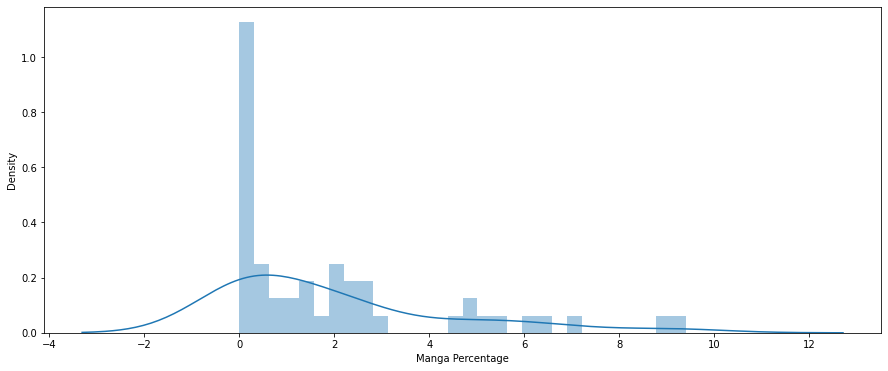

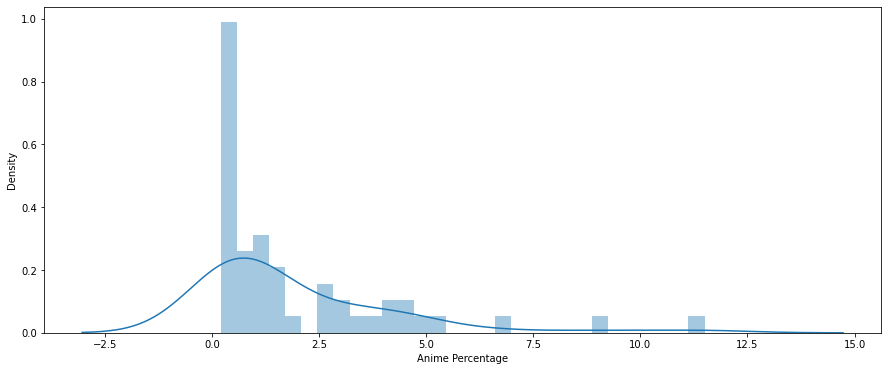

In [8]:
for x in ['TotalChapters', 'TotalPages', 'TotalEpisodes', 'TotalMinutes(avg 24)', 'Manga Percentage', 'Anime Percentage']:
    plt.figure(figsize = (15,6))
    sns.distplot(df[x],kde = True,bins = 30)

* The graph shows that the data is left skewed, most of the data is near the value of zero in all the plots.

# Roronoa Zoro
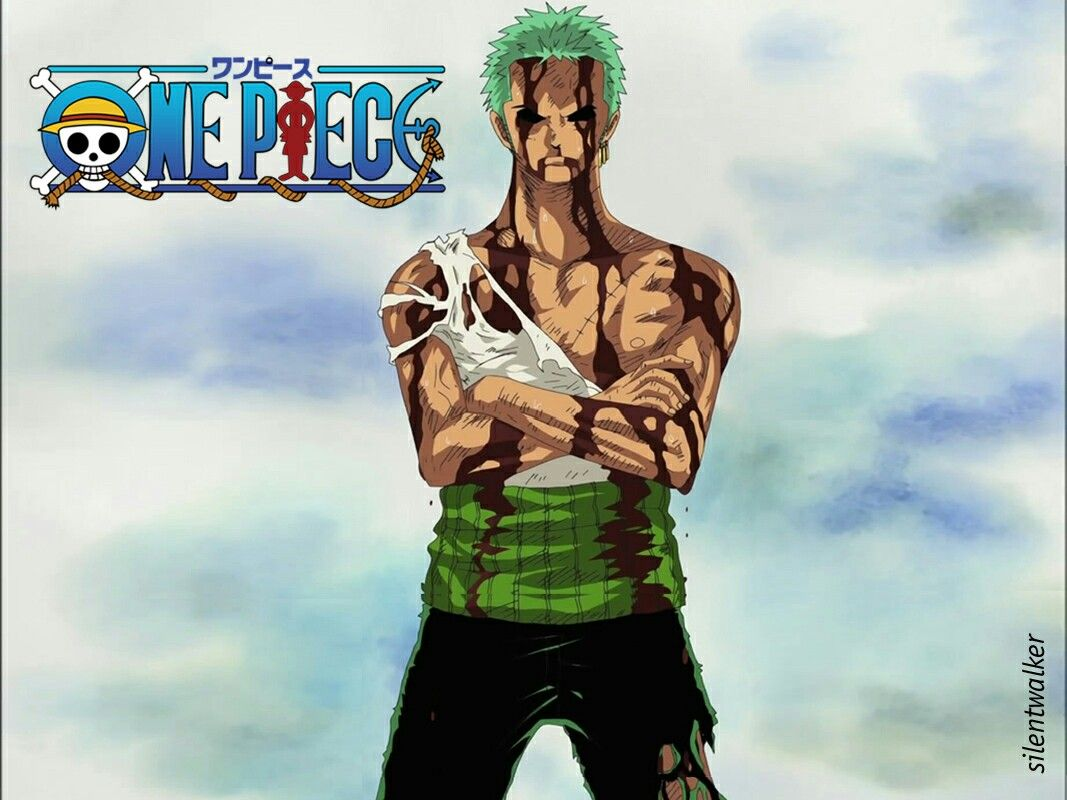
### Zoro to Kuma in Thriller Bark

## <span style="color:green">If I can't even protect my captain's dream, then whatever ambition I have is nothing but talk!</span>

Reference: https://www.pinterest.com/pin/420453315213045047/

In [9]:
def barplot(Arc, column, df, title):
    plt.figure(figsize = (20, 8))
    bar_plot1 = sns.barplot(x = Arc, y = column, data = df)
    plt.axhline(y= df[column].mean(), label='Average')
    plt.legend()
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    plt.xlabel('Arc', fontsize = 15)
    plt.ylabel('Total Number of Chapters', fontsize = 15)
    plt.title(f'{title} in each arc', fontsize = 20)
    plt.xticks(rotation = 90)
    total = sum(df[column])

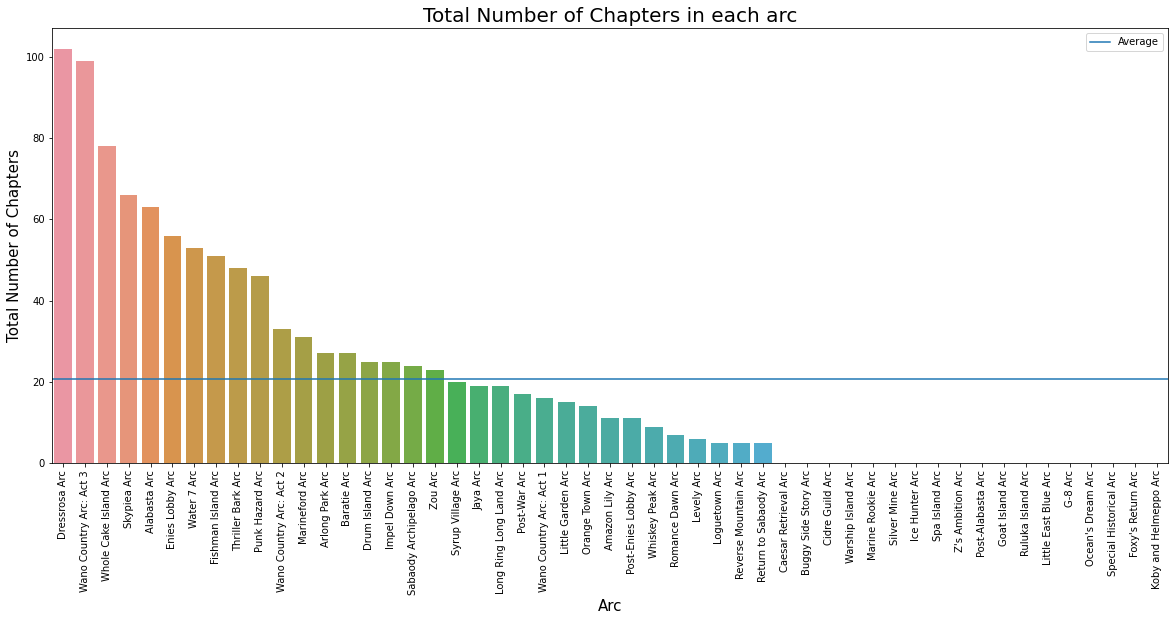

In [10]:
barplot('Arc', 'TotalChapters', df.sort_values(by=['TotalChapters'], ascending=False), 'Total Number of Chapters')

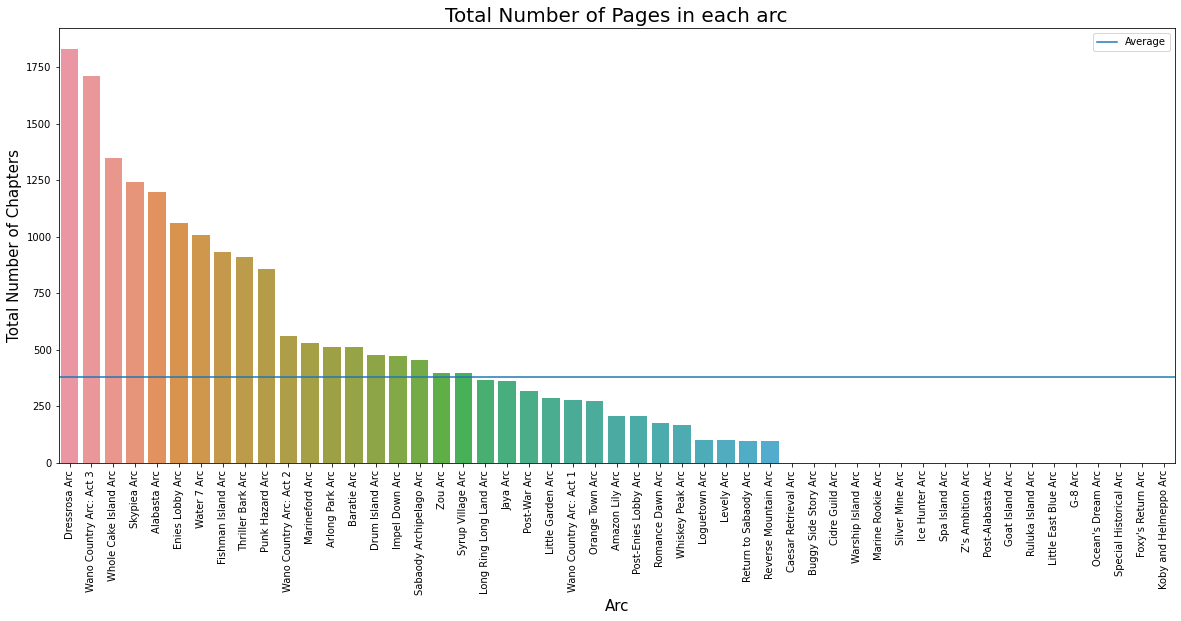

In [11]:
barplot('Arc', 'TotalPages', df.sort_values(by=['TotalPages'], ascending=False), 'Total Number of Pages')

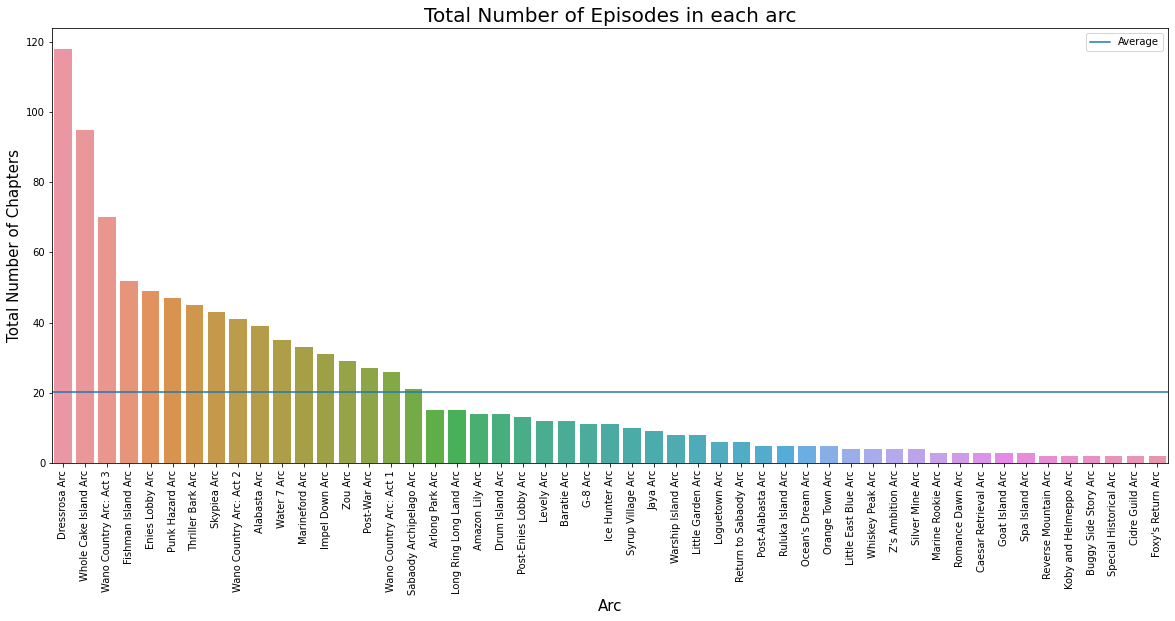

In [12]:
barplot('Arc', 'TotalEpisodes', df.sort_values(by=['TotalEpisodes'], ascending=False), 'Total Number of Episodes')

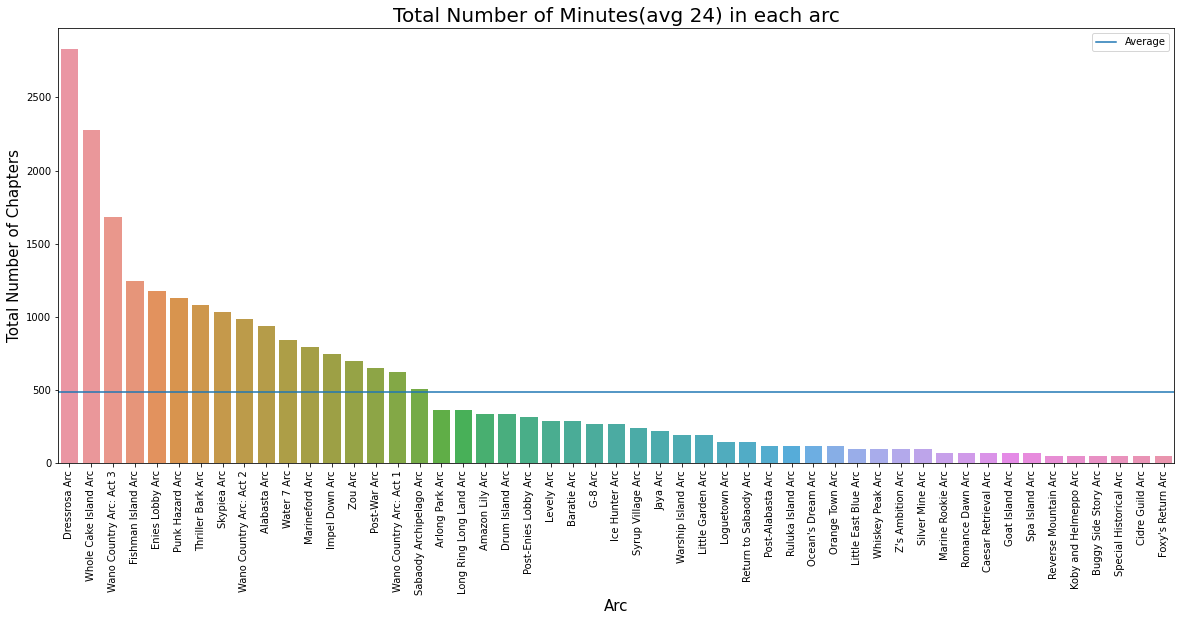

In [13]:
barplot('Arc', 'TotalMinutes(avg 24)', df.sort_values(by=['TotalMinutes(avg 24)'], ascending=False), 'Total Number of Minutes(avg 24)')

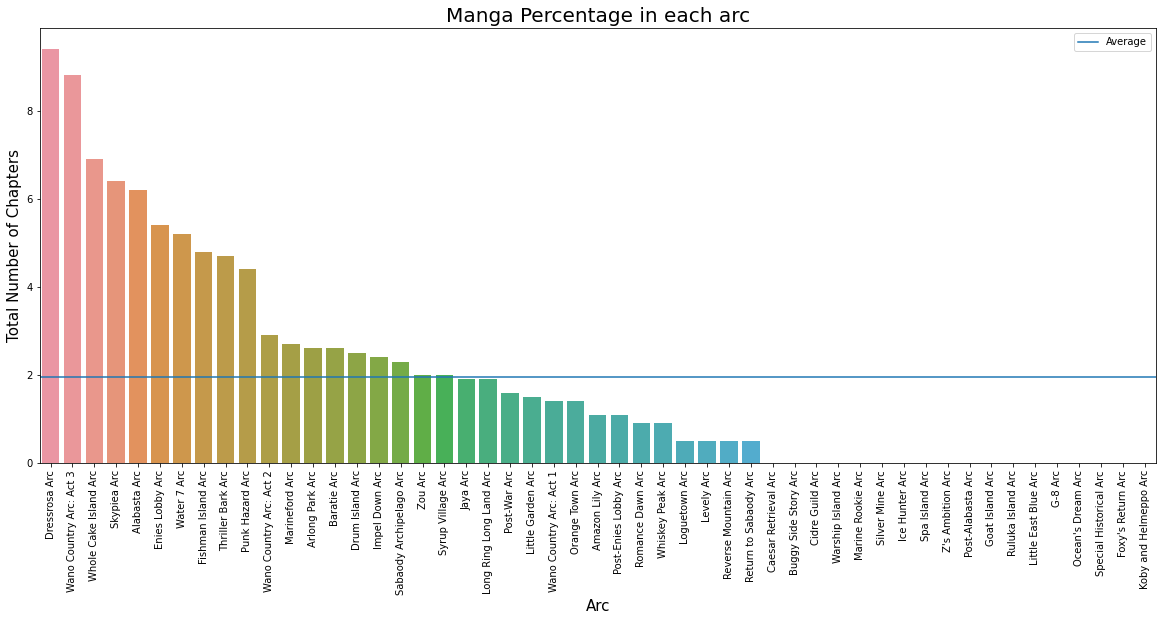

In [14]:
barplot('Arc', 'Manga Percentage', df.sort_values(by=['Manga Percentage'], ascending=False), 'Manga Percentage')

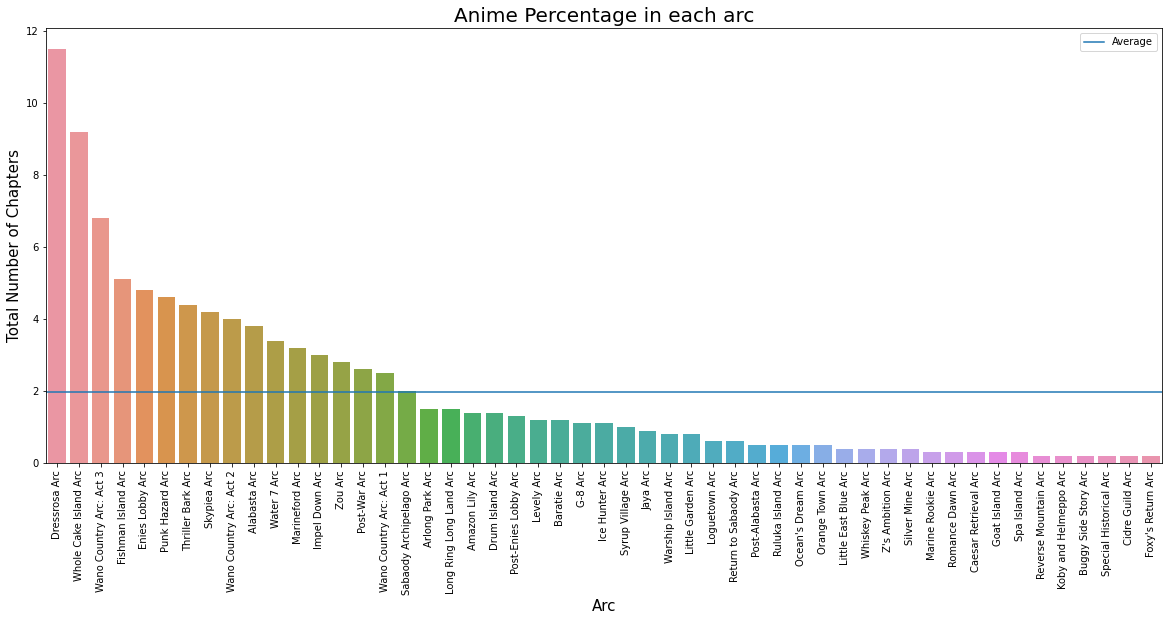

In [15]:
barplot('Arc', 'Anime Percentage', df.sort_values(by=['Anime Percentage'], ascending=False), 'Anime Percentage')

* The data has a little higher number of arcs which are having small chapters, pages, episodes and overall duration filler arcs (which are filled just to give some diversion to the story)

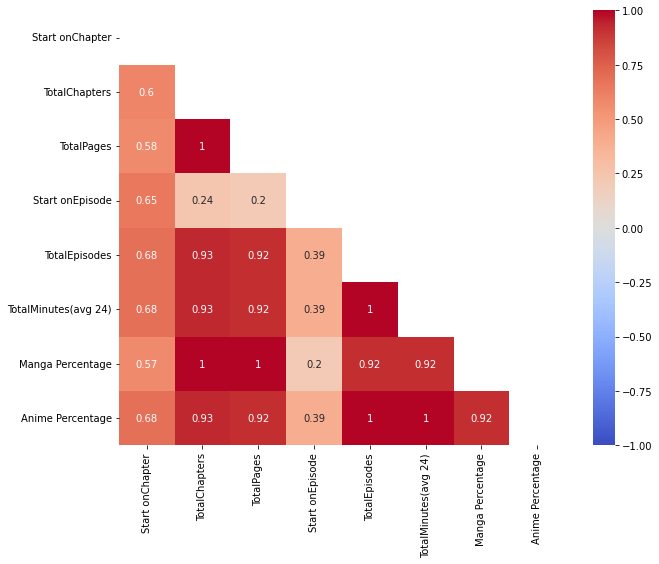

In [16]:
cm = df.corr()
mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,8))
sns.heatmap(cm,
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            annot=True,
            mask = mask);

* The above correlation plot shows that most of the features have hive positive linear correlation. So, the number of episodes and duration are dependent on number of chapters and number of pages in the chapter.

# Edward NewGate (AKA WhiteBeard)
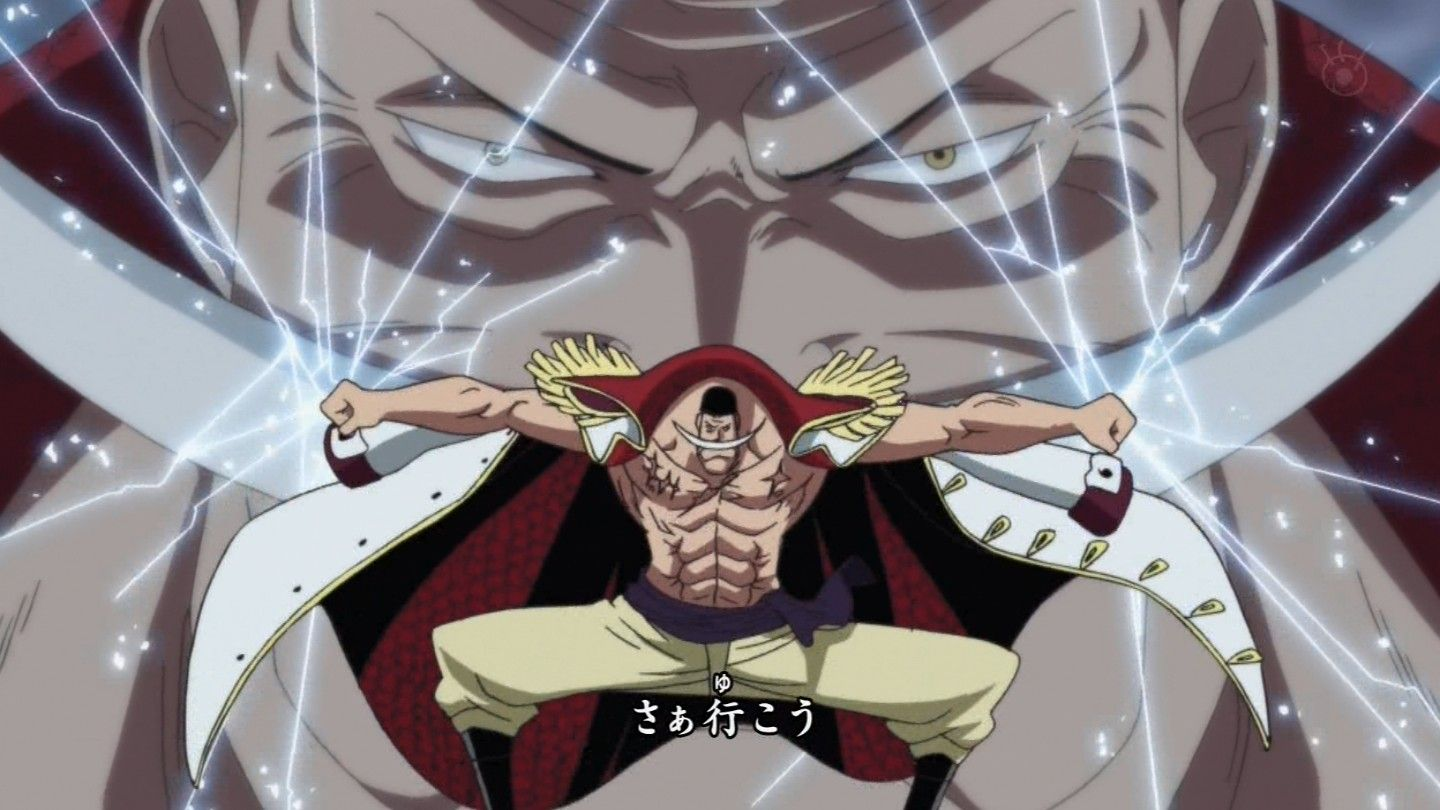

### Whitebeard at Marineford and his last words are
## <span style="color:red">ONE PIECE... DOES EXIST!</span>

Reference: https://www.pinterest.com/pin/189010515589639594/

In [17]:
gc.collect()

72527

# THE END